II. Compte rendu
1) Experience 1:

In [1]:
#Importing packages:
from re import S
from sklearn import datasets 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

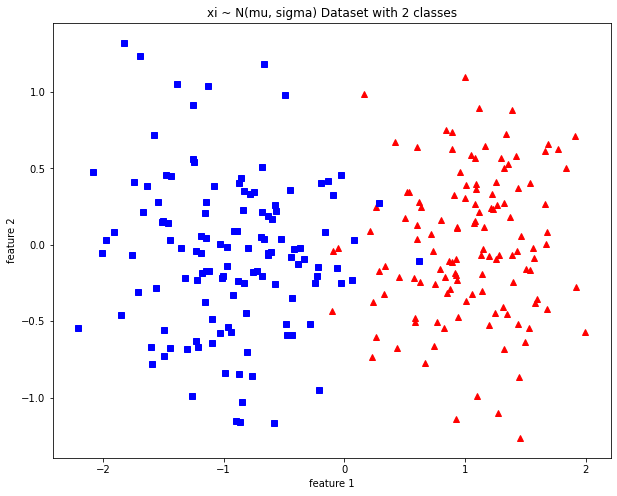

In [7]:
#Generating Datasets (xi ~ N(mu, sigma)): 

#fixing the mean and cov values
mu1 = [-1,0]
sigma1 = 0.25
mu2 = [1,0] 
sigma2 = 0.25

#Generating datasets 
X1,y1=datasets.make_gaussian_quantiles(mean=mu1,cov=sigma1,n_samples=125,n_features=2,n_classes=1)
X2,y2=datasets.make_gaussian_quantiles(mean=mu2,cov=sigma2,n_samples=125,n_features=2,n_classes=1)
y1=np.ones(shape=(125,))
y2=-y1

#Generating targets
X=np.concatenate((X1,X2),axis=0)
y=np.concatenate((y1,y2),axis=0)

#plotting the distribution
fig = plt.figure(figsize=(10,8)) 
plt.plot(X[:, 0][y == -1], X[:, 1][y ==-1], 'r^') 
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs') 
plt.xlabel("Feature 1") 
plt.ylabel("Feature 2")
plt.title('xi ~ N(mu, sigma) Dataset with 2 classes')
plt.show()

The perceptron algorithm does not converge because the data is not linearly separable. We can use an additional parameter for the number of iterations and consider it converging if attains a certain number of iterations

In [8]:
#Spliting the data into a train set and a test set
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)
print(x_train.shape,x_test.shape)

(200, 2) (50, 2)


In [10]:
#Define the activation Function Relu)
def acti_func(z):
    return 1 if z>0 else 0

In [11]:
#Define Perceptron Algorithm
def perceptron(X, y, lr, epochs): 
    # X --> Inputs. 
    # y --> labels/target. 
    # lr --> learning rate. 
    # epochs --> Number of iterations. 
    # m-> number of training examples 
    # n-> number of features 
    m,n = X.shape 
    # Initializing parameters(theta) to zeros. 
    # +1 in n+1 for the bias term. 
    w = np.zeros((n+1,1)) 
    # Empty list to store how many examples were
    # misclassified at every iteration. 
    n_miss_list = [] 
    # Training. 
    for epoch in range(epochs):
    # variable to store #misclassified. 
      n_miss = 0 
      # looping for every example. 
      for idx, x_i in enumerate(X):
          # Insering 1 for bias, 
          X0 = 1 
          x_i = np.insert(x_i, 0, 1).reshape(-1,1) 
          # Calculating prediction/hypothesis. 
          y_hat = acti_func(np.dot(x_i.T, w)) 
          # Updating if the example is misclassified. 
          if (np.squeeze(y_hat) - y[idx]) != 0: 
              w=w-lr*(np.squeeze(y_hat) - y[idx])*x_i
            # Incrementing by 1. 
              n_miss+=1
          # Appending number of misclassified examples
          # at every iteration.
      n_miss_list.append(n_miss) 
    return w, n_miss_list

In [12]:
#Define the plot Function
def plot_decision_boundary(X, w): 
# X --> Inputs 
# w --> parameters 
# The Line is y=mx+c
# mx+c = w0.X0 + w1.X1 + w2.X2
 x1 = [min(X[:,0]), max(X[:,0])] 
 m = -w[1]/w[2]
 c = -w[0]/w[2]
 x2 = m*x1 + c
 plt.plot(x1,x2)

[[ -699.9       ]
 [-1151.71360542]
 [   26.71528793]] [131, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130]


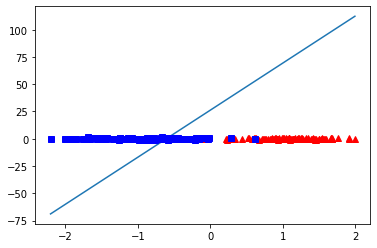

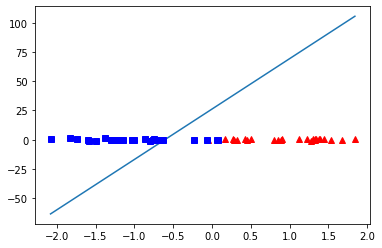

the accuracy of the model on the train set:  65.0


In [13]:
#Training the model with the perceptron
w,miss=perceptron(x_train,y_train,0.1,100)
print(w,miss)
#Ploting the decision boundry
plot_decision_boundary(x_train,w)
plt.plot(x_train[:, 0][y_train == -1], x_train[:, 1][y_train==-1], 'r^') 
plt.plot(x_train[:, 0][y_train == 1], x_train[:, 1][y_train == 1], 'bs') 
plt.show()
#Testing the model
plot_decision_boundary(x_test,w)
plt.plot(x_test[:, 0][y_test == -1], x_test[:, 1][y_test==-1], 'r^') 
plt.plot(x_test[:, 0][y_test == 1], x_test[:, 1][y_test == 1], 'bs') 
plt.show()
#Computing the accuracy of the model
print("the accuracy of the model on the train set: ",(miss[len(miss)-1]/200)*100)

2) Experience 2:
We will repeat the same experience with sigma1=sigma2=0.75

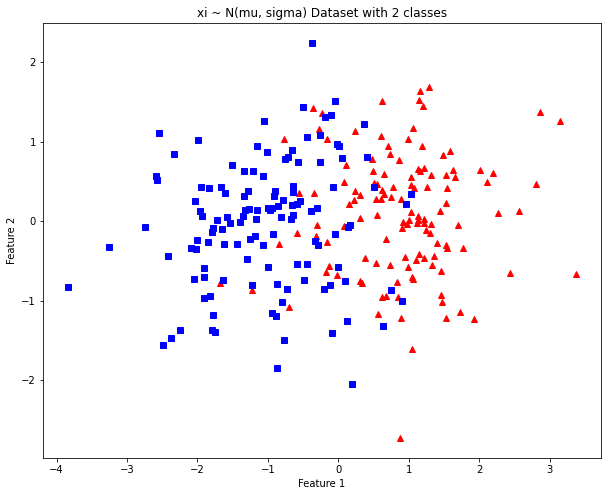

(200, 2) (50, 2)
[[-623.5       ]
 [-840.66701051]
 [  33.37401842]] [133, 131, 131, 131, 131, 131, 131, 130, 131, 130, 131, 131, 130, 131, 131, 130, 131, 130, 131, 131, 130, 131, 131, 130, 131, 130, 131, 131, 130, 131, 131, 130, 131, 130, 131, 131, 130, 131, 131, 130, 131, 130, 131, 131, 130, 131, 131, 130, 131, 130, 131, 131, 130, 131, 131, 130, 131, 130, 131, 131, 130, 131, 131, 130, 131, 131, 130, 131, 130, 131, 131, 130, 131, 131, 130, 131, 130, 131, 131, 130, 131, 131, 130, 131, 130, 131, 131, 130, 131, 131, 130, 131, 130, 131, 131, 130, 131, 131, 130, 131]


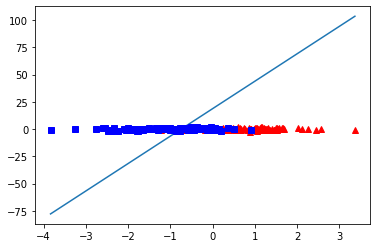

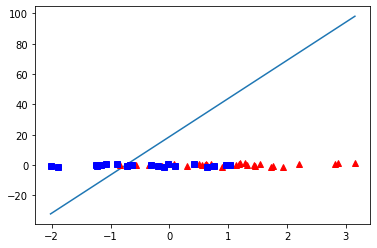

the accuracy of the model on the train set:  65.5


In [15]:
#Generating Datasets (xi ~ N(mu, sigma)): 

#fixing the mean and cov values
mu1 = [-1,0]
sigma1 = 0.75
mu2 = [1,0] 
sigma2 = 0.75

#Generating datasets 
X1,y1=datasets.make_gaussian_quantiles(mean=mu1,cov=sigma1,n_samples=125,n_features=2,n_classes=1)
X2,y2=datasets.make_gaussian_quantiles(mean=mu2,cov=sigma2,n_samples=125,n_features=2,n_classes=1)
y1=np.ones(shape=(125,))
y2=-y1

#Generating targets
X=np.concatenate((X1,X2),axis=0)
y=np.concatenate((y1,y2),axis=0)

#plotting the distribution
fig = plt.figure(figsize=(10,8)) 
plt.plot(X[:, 0][y == -1], X[:, 1][y ==-1], 'r^') 
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs') 
plt.xlabel("Feature 1") 
plt.ylabel("Feature 2")
plt.title('xi ~ N(mu, sigma) Dataset with 2 classes')
plt.show()

#Spliting the data into a train set and a test set
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)
print(x_train.shape,x_test.shape)

#Define the activation Function Relu)
def acti_func(z):
    return 1 if z>0 else 0

#Define Perceptron Algorithm
def perceptron(X, y, lr, epochs): 
    # X --> Inputs. 
    # y --> labels/target. 
    # lr --> learning rate. 
    # epochs --> Number of iterations. 
    # m-> number of training examples 
    # n-> number of features 
    m,n = X.shape 
    # Initializing parameters(theta) to zeros. 
    # +1 in n+1 for the bias term. 
    w = np.zeros((n+1,1)) 
    # Empty list to store how many examples were
    # misclassified at every iteration. 
    n_miss_list = [] 
    # Training. 
    for epoch in range(epochs):
    # variable to store #misclassified. 
      n_miss = 0 
      # looping for every example. 
      for idx, x_i in enumerate(X):
          # Insering 1 for bias, 
          X0 = 1 
          x_i = np.insert(x_i, 0, 1).reshape(-1,1) 
          # Calculating prediction/hypothesis. 
          y_hat = acti_func(np.dot(x_i.T, w)) 
          # Updating if the example is misclassified. 
          if (np.squeeze(y_hat) - y[idx]) != 0: 
              w=w-lr*(np.squeeze(y_hat) - y[idx])*x_i
            # Incrementing by 1. 
              n_miss+=1
          # Appending number of misclassified examples
          # at every iteration.
      n_miss_list.append(n_miss) 
    return w, n_miss_list

#Define the plot Function
def plot_decision_boundary(X, w): 
# X --> Inputs 
# w --> parameters 
# The Line is y=mx+c
# mx+c = w0.X0 + w1.X1 + w2.X2
 x1 = [min(X[:,0]), max(X[:,0])] 
 m = -w[1]/w[2]
 c = -w[0]/w[2]
 x2 = m*x1 + c
 plt.plot(x1,x2)
    
#Training the model with the perceptron
w,miss=perceptron(x_train,y_train,0.1,100)
print(w,miss)
#Ploting the decision boundry
plot_decision_boundary(x_train,w)
plt.plot(x_train[:, 0][y_train == -1], x_train[:, 1][y_train==-1], 'r^') 
plt.plot(x_train[:, 0][y_train == 1], x_train[:, 1][y_train == 1], 'bs') 
plt.show()
#Testing the model
plot_decision_boundary(x_test,w)
plt.plot(x_test[:, 0][y_test == -1], x_test[:, 1][y_test==-1], 'r^') 
plt.plot(x_test[:, 0][y_test == 1], x_test[:, 1][y_test == 1], 'bs') 
plt.show()
#Computing the accuracy of the model
print("the accuracy of the model on the train set: ",(miss[len(miss)-1]/200)*100)